In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


campaign_data = pd.read_csv('Jnr Analyst Task Data - Campaign Data.csv')
creative_data = pd.read_csv('Jnr Analyst Task Data - Creative Metadata.csv')
df = pd.merge(campaign_data,creative_data, left_on='CreativeID', right_on='CreativeID', how='left')
df['CTR'] = df['Clicks'] / df['Impressions'] * 100
df['Completion Rate'] = df['VideoCompletions'] / df['VideoStarts'] * 100
df.head(2)



df.to_csv('/Users/Connor/Desktop/MOBKOI Analysis/MergedData.csv')



In [63]:
# Impressions and CTR tables for creative and site categories 

Creative_Cat= pd.pivot_table(df,values = ['Impressions','Clicks'],index =['CreativeCategory'],aggfunc=np.sum)
Creative_Cat['Impressions %'] = Creative_Cat['Impressions'] / np.sum(Creative_Cat['Impressions']) * 100
Creative_Cat['CTR(%)'] = Creative_Cat['Clicks'] / Creative_Cat['Impressions'] * 100
Creative_Cat['CTR Rank'] = Creative_Cat['CTR(%)'].rank(ascending = False)


Site_Cat = pd.pivot_table(df,values = ['Impressions','Clicks'],index =['SiteCategory'],aggfunc=np.sum)
Site_Cat['Impressions %'] = Site_Cat['Impressions'] / np.sum(Site_Cat['Impressions']) * 100
Site_Cat['CTR(%)'] = Site_Cat['Clicks'] / Site_Cat['Impressions'] * 100
Site_Cat['CTR Rank'] = Site_Cat['CTR(%)'].rank(ascending = False)

OS = pd.pivot_table(df,values = ['Impressions','Clicks'],index =['OperatingSystem'],aggfunc=np.sum)
OS['Impressions %'] = OS['Impressions'] / np.sum(OS['Impressions']) * 100
OS['CTR(%)'] = OS['Clicks'] / OS['Impressions'] * 100
OS['CTR Rank'] = OS['CTR(%)'].rank(ascending = False)

print(Creative_Cat.sort_values('Impressions',ascending=False))

print('') #Blank Line to separate tables
print('') #Blank Line to separate tables

print(Site_Cat.sort_values('Impressions',ascending=False))

print('') #Blank Line to separate tables
print('') #Blank Line to separate tables

print(OS.sort_values('Impressions',ascending=False))



                      Clicks  Impressions  Impressions %    CTR(%)  CTR Rank
CreativeCategory                                                            
Sports                 16286      3466579      35.258887  0.469800       7.0
News                   11882      2132374      21.688568  0.557219       5.0
Lifestyle               8993      1908099      19.407447  0.471307       6.0
Entertainment           3221       797582       8.112278  0.403846       8.0
Gaming                  2570       708603       7.207265  0.362685       9.0
Art                     2699       369612       3.759357  0.730225       1.0
Food                    1182       166105       1.689469  0.711598       2.0
NewsandSports            887       144386       1.468563  0.614325       3.0
NewsandEntertainment     801       138448       1.408167  0.578557       4.0


                     Clicks  Impressions  Impressions %    CTR(%)  CTR Rank
SiteCategory                                                               

In [120]:
# Impressions and Completion Rate tables for creative and site categories 

Creative_Comp= pd.pivot_table(df,values = ['Impressions','VideoStarts','VideoCompletions'],index =['CreativeCategory','MediaFormat'],aggfunc=np.sum)
Creative_Comp['Impressions %'] = Creative_Comp['Impressions'] / np.sum(Creative_Comp['Impressions']) * 100
Creative_Comp['Completion%'] = Creative_Comp['VideoCompletions'] / Creative_Comp['VideoStarts'] * 100
Creative_Comp['Comp Rank'] = Creative_Comp['Completion%'].rank(ascending = False)


Site_Comp = pd.pivot_table(df,values = ['Impressions','VideoStarts','VideoCompletions'],index =['SiteCategory','MediaFormat'],aggfunc=np.sum)
Site_Comp['Impressions %'] = Site_Comp['Impressions'] / np.sum(Site_Comp['Impressions']) * 100
Site_Comp['Completion%'] = Site_Comp['VideoCompletions'] / Site_Comp['VideoStarts'] * 100
Site_Comp['Comp Rank'] = Site_Comp['Completion%'].rank(ascending = False)

OS_Comp = pd.pivot_table(df,values = ['Impressions','VideoStarts','VideoCompletions'],index =['OperatingSystem','MediaFormat'],aggfunc=np.sum)
OS_Comp['Impressions %'] = OS_Comp['Impressions'] / np.sum(OS['Impressions']) * 100
OS_Comp['Completion%'] = OS_Comp['VideoCompletions'] / OS_Comp['VideoStarts'] * 100
OS_Comp['Comp Rank'] = OS_Comp['Completion%'].rank(ascending = False)

Creative = Creative_Comp[Creative_Comp['VideoStarts']>0].sort_values('Impressions',ascending = False)
Creative





,,Impressions,VideoCompletions,VideoStarts,Impressions %,Completion%,Comp Rank
CreativeCategory,MediaFormat,,,,,,
Sports,Vertical Video,732291,130839,316042,7.448198,41.399244,2.0
Art,Vertical Video,369612,68436,161147,3.759357,42.468057,1.0
Lifestyle,Vertical Video,300170,35613,97402,3.053056,36.562904,4.0
Food,Vertical Video,166105,28721,71348,1.689469,40.254807,3.0


In [121]:
Site = Site_Comp[Site_Comp['VideoStarts']>0].sort_values('Impressions',ascending = False)
Site

,,Impressions,VideoCompletions,VideoStarts,Impressions %,Completion%,Comp Rank
SiteCategory,MediaFormat,,,,,,
News,Vertical Video,853194,137638,335905,8.677913,40.975276,3.0
Sport,Vertical Video,273569,62113,127399,2.782495,48.754700,1.0
Lifestyle,Vertical Video,266457,30992,102494,2.710158,30.237868,6.0
Entertainment,Vertical Video,156182,30684,74558,1.588541,41.154537,2.0
Tech / Gaming,Vertical Video,17375,2037,5179,0.176723,39.331917,4.0
Fashion / Lifestyle,Vertical Video,1401,145,404,0.014250,35.891089,5.0


In [122]:
OS = OS_Comp[OS_Comp['VideoStarts']>0].sort_values('Impressions',ascending = False)
OS

,,Impressions,VideoCompletions,VideoStarts,Impressions %,Completion%,Comp Rank
OperatingSystem,MediaFormat,,,,,,
iOS,Vertical Video,892130,179712,438535,56.889588,40.980081,2.0
Android,Vertical Video,653374,82074,203945,41.664530,40.243203,3.0
Other,Vertical Video,22674,1823,3459,1.445882,52.703093,1.0


In [ ]:
# The above tables Impressions% do not add to 100

In [11]:
creative_site = df.pivot_table(index='CreativeName',columns='Site',values='Impressions',aggfunc=np.sum, margins=True)
creative_site.to_csv('/Users/Connor/Desktop/MOBKOI Analysis/creative_site.csv')


In [21]:
creative_imp_ctr = pd.pivot_table(df,values = ['Impressions','Clicks'],index =['CreativeName','CreativeCategory'],aggfunc=np.sum)
creative_imp_ctr['CTR'] = creative_imp_ctr['Clicks'] / creative_imp_ctr['Impressions'] 
creative_imp_ctr.head(10).sort_values('CTR',ascending = False)



,,Clicks,Impressions,CTR
CreativeName,CreativeCategory,,,
Artful Dodger,Art,979,140307,0.006978
Breaking News,News,4996,873265,0.005721
Cosmic Cakes,NewsandEntertainment,230,50225,0.004579
DoYouEvenLift?,Sports,3983,883221,0.004510
Box Sets,Entertainment,1007,240724,0.004183
Chart Toppers,Entertainment,783,189362,0.004135
Celeb Gossip,Entertainment,851,208402,0.004083
Connoisseur,Lifestyle,970,240318,0.004036
Animation,Gaming,1452,392899,0.003696


In [32]:
site_imp_ctr = pd.pivot_table(df,values = ['Impressions','Clicks'],index =['Site'],aggfunc=np.sum)
site_imp_ctr['CTR'] = site_imp_ctr['Clicks'] / site_imp_ctr['Impressions'] 
site_imp_ctr1 = site_imp_ctr.sort_values('CTR',ascending = False)
site_imp_ctr1.head(10)

,Clicks,Impressions,CTR
Site,,,
Edgy Lifestyles,498,48346,0.010301
The City Daily,6677,847024,0.007883
SportSpam,138,18529,0.007448
UK Broadsheet,4996,686397,0.007279
The Ocho Sports Network,2194,324549,0.006760
CityNews,7219,1204091,0.005995
The ClothesRack,348,61412,0.005667
Business Times,5674,1048968,0.005409
MusicRoom,1759,326003,0.005396


In [26]:
creative_imp_ctr = pd.pivot_table(df,values = ['Impressions','Clicks'],index =['CreativeName','CreativeCategory'],aggfunc=np.sum)
creative_imp_ctr['CTR'] = creative_imp_ctr['Clicks'] / creative_imp_ctr['Impressions'] 
creative_imp_ctr1 = creative_imp_ctr.sort_values('CTR',ascending = False)
creative_imp_ctr1.head(10)

,,Clicks,Impressions,CTR
CreativeName,CreativeCategory,,,
Pot of Gold,Lifestyle,615,64573,0.009524
Women's Cycling,Lifestyle,795,88634,0.008969
MyLovelyHorse,Lifestyle,432,49150,0.008789
ToneDeaf,NewsandEntertainment,158,18999,0.008316
SneakerPimps,Lifestyle,398,49094,0.008107
Talent,NewsandEntertainment,147,19308,0.007613
Life Hacks,Lifestyle,368,48719,0.007554
Smart Art,Art,1720,229305,0.007501
FoodPics,Food,1182,166105,0.007116


(0.002, 0.01)

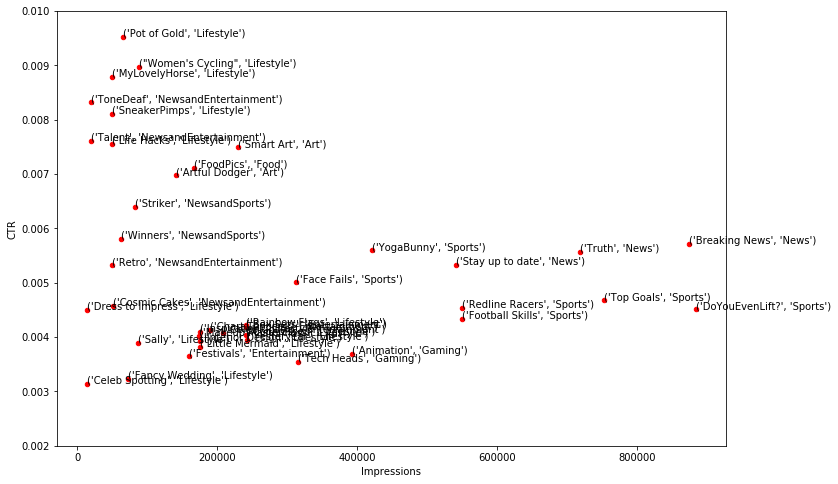

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
names = creative_imp_ctr.index.values

plt.scatter(creative_imp_ctr['Impressions'],creative_imp_ctr['CTR'], color = 'red', edgecolors='red',zorder = 1, s=20)
plt.xlabel('Impressions') 
plt.ylabel('CTR') 
for i, txt in enumerate(names):
    ax.annotate(txt, (creative_imp_ctr['Impressions'][i], creative_imp_ctr['CTR'][i]))

axes = plt.gca()
axes.set_ylim([0.002,0.01])

# plt.savefig('/Users/Connor/Desktop/MOBKOI Analysis/creative_imp_ctr.png')






(0, 0.0125)

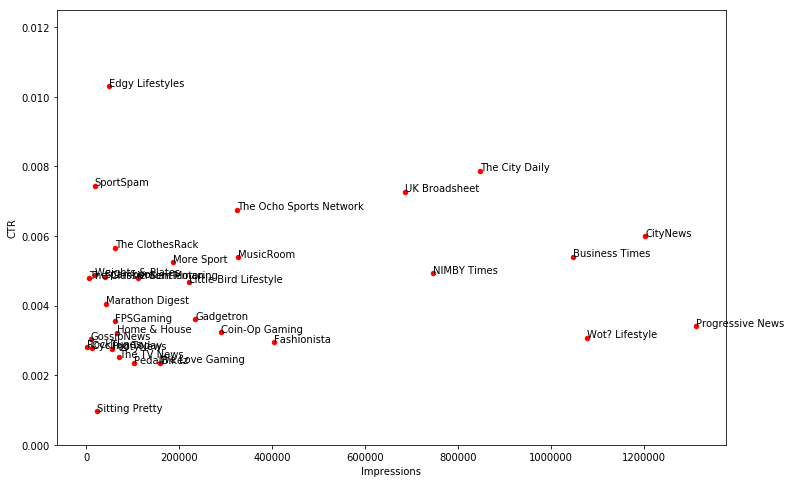

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
names = site_imp_ctr.index.values

plt.scatter(site_imp_ctr['Impressions'],site_imp_ctr['CTR'], color = 'red', edgecolors='red',zorder = 1, s=20)
plt.xlabel('Impressions') 
plt.ylabel('CTR') 
for i, txt in enumerate(names):
    ax.annotate(txt, (site_imp_ctr['Impressions'][i], site_imp_ctr['CTR'][i]))
    
axes = plt.gca()
axes.set_ylim([0,0.0125])

In [83]:
site_imp_comp = pd.pivot_table(df,values = ['Impressions','VideoStarts','VideoCompletions'],index =['Site'],aggfunc=np.sum)
site_imp_comp['Completion Rate'] = site_imp_comp['VideoCompletions'] / site_imp_comp['VideoStarts'] 
site_imp_comp1 = site_imp_comp.sort_values('Completion Rate',ascending = False).head(24)
site_imp_comp1

,Impressions,VideoCompletions,VideoStarts,Completion Rate
Site,,,,
Sitting Pretty,23806,2447,3785,0.646499
PedalBikez,102835,2582,4896,0.527369
Vroom Motoring,112448,2359,4571,0.516080
More Sport,187037,37579,73254,0.512996
The Ocho Sports Network,324549,14725,29263,0.503195
Business Times,1048968,24100,48159,0.500426
Progressive News,1312601,19738,45500,0.433802
NIMBY Times,745731,19459,45345,0.429132
CityNews,1204091,43221,101486,0.425881


In [86]:
creative_imp_comp = pd.pivot_table(df,values = ['Impressions','VideoStarts','VideoCompletions'],index =['CreativeName'],aggfunc=np.sum)
creative_imp_comp['Completion Rate'] = creative_imp_comp['VideoCompletions'] / creative_imp_comp['VideoStarts'] 
creative_imp_comp1 = creative_imp_comp.sort_values('Completion Rate',ascending = False).head(10)
creative_imp_comp1

,Impressions,VideoCompletions,VideoStarts,Completion Rate
CreativeName,,,,
Artful Dodger,140307,26141,61469,0.425271
Smart Art,229305,42295,99678,0.424316
Face Fails,312123,56739,136324,0.416207
YogaBunny,420168,74100,179718,0.412313
FoodPics,166105,28721,71348,0.402548
Life Hacks,48719,6012,15980,0.376220
Pot of Gold,64573,7724,20930,0.369040
MyLovelyHorse,49150,5786,15873,0.364518
SneakerPimps,49094,5717,15782,0.362248


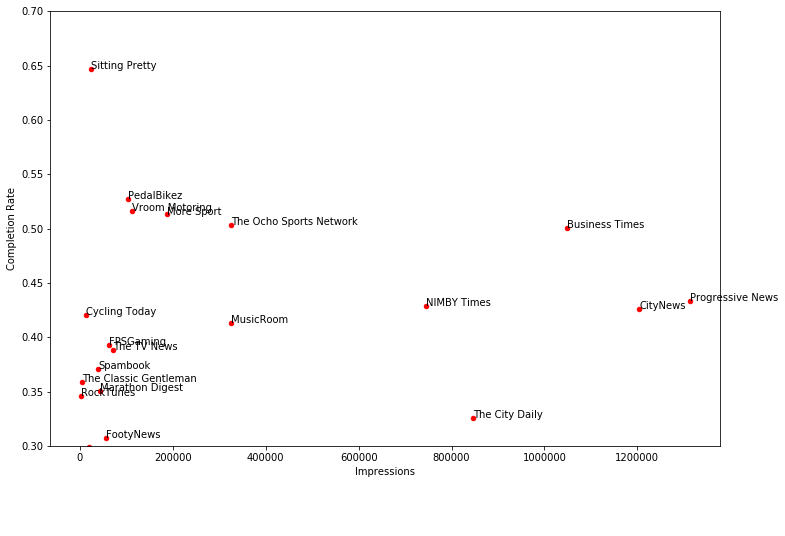

In [84]:
fig, ax = plt.subplots(figsize=(12,8))
names1 = site_imp_comp1.index.values

plt.scatter(site_imp_comp1['Impressions'],site_imp_comp1['Completion Rate'], color = 'red', edgecolors='red',zorder = 1, s=20)
plt.xlabel('Impressions') 
plt.ylabel('Completion Rate') 
for i, txt in enumerate(names1):
    ax.annotate(txt, (site_imp_comp1['Impressions'][i], site_imp_comp1['Completion Rate'][i]))
    
axes = plt.gca()
axes.set_ylim([0.3,0.7])

plt.savefig('/Users/Connor/Desktop/MOBKOI Analysis/Pics/site_imp_comp.png')

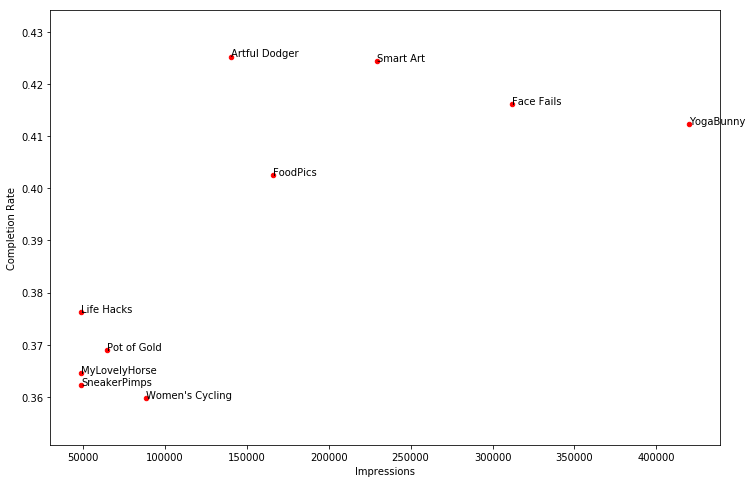

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
names1 = creative_imp_comp1.index.values

plt.scatter(creative_imp_comp1['Impressions'],creative_imp_comp1['Completion Rate'], color = 'red', edgecolors='red',zorder = 1, s=20)
plt.xlabel('Impressions') 
plt.ylabel('Completion Rate') 
for i, txt in enumerate(names1):
    ax.annotate(txt, (creative_imp_comp1['Impressions'][i], creative_imp_comp1['Completion Rate'][i]))
    
# axes = plt.gca()
# axes.set_ylim([0,0.8])

plt.savefig('/Users/Connor/Desktop/MOBKOI Analysis/Pics/creative_imp_comp.png')

In [95]:
site_imp_start = pd.pivot_table(df,values = ['Impressions','VideoStarts'],index =['Site'],aggfunc=np.sum)
site_imp_start['Start Rate'] = site_imp_start['VideoStarts'] / site_imp_start['Impressions'] 
site_imp_start1 = site_imp_start.sort_values('Start Rate',ascending = False).head(24)
site_imp_start1

,Impressions,VideoStarts,Start Rate
Site,,,
More Sport,187037,73254,0.391655
GossipNews,9574,3181,0.332254
SportSpam,18529,5140,0.277403
Spambook,39658,9598,0.242019
MusicRoom,326003,70639,0.216682
Sitting Pretty,23806,3785,0.158994
The City Daily,847024,95415,0.112647
Marathon Digest,42902,4659,0.108596
The Ocho Sports Network,324549,29263,0.090165


In [93]:
creative_imp_start = pd.pivot_table(df,values = ['Impressions','VideoStarts'],index =['CreativeName'],aggfunc=np.sum)
creative_imp_start['Start Rate'] = creative_imp_start['VideoStarts'] / creative_imp_start['Impressions'] 
creative_imp_start1 = creative_imp_start.sort_values('Start Rate',ascending = False).head(10)
creative_imp_start1

,Impressions,VideoStarts,Start Rate
CreativeName,,,
Artful Dodger,140307,61469,0.438104
Face Fails,312123,136324,0.436764
Smart Art,229305,99678,0.434696
FoodPics,166105,71348,0.429536
YogaBunny,420168,179718,0.427729
Life Hacks,48719,15980,0.328003
Women's Cycling,88634,28837,0.325349
Pot of Gold,64573,20930,0.324129
MyLovelyHorse,49150,15873,0.322950


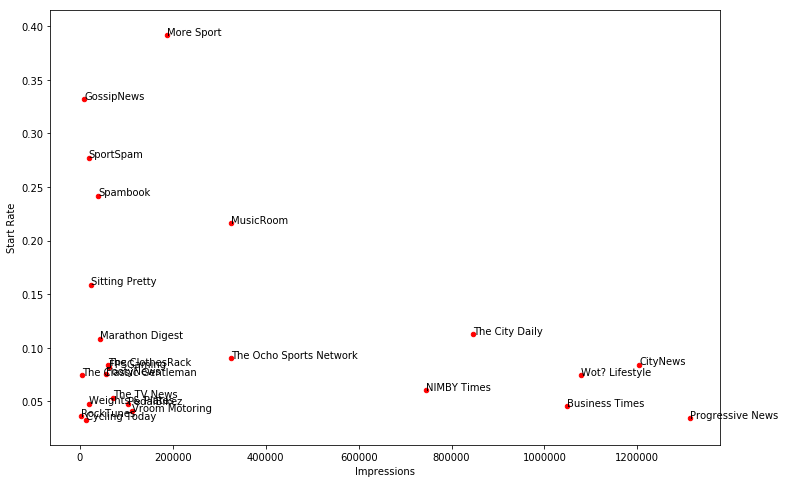

In [97]:
fig, ax = plt.subplots(figsize=(12,8))
names1 = site_imp_start1.index.values

plt.scatter(site_imp_start1['Impressions'],site_imp_start1['Start Rate'], color = 'red', edgecolors='red',zorder = 1, s=20)
plt.xlabel('Impressions') 
plt.ylabel('Start Rate') 
for i, txt in enumerate(names1):
    ax.annotate(txt, (site_imp_start1['Impressions'][i], site_imp_start1['Start Rate'][i]))
    
# axes = plt.gca()
# axes.set_ylim([0,0.8])

plt.savefig('/Users/Connor/Desktop/MOBKOI Analysis/Pics/site_imp_start.png')

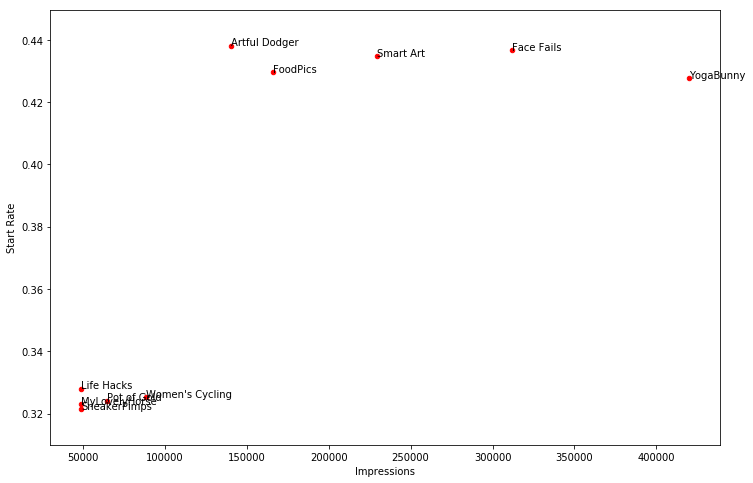

In [103]:
fig, ax = plt.subplots(figsize=(12,8))
names1 = creative_imp_start1.index.values

plt.scatter(creative_imp_start1['Impressions'],creative_imp_start1['Start Rate'], color = 'red', edgecolors='red',zorder = 1, s=20)
plt.xlabel('Impressions') 
plt.ylabel('Start Rate') 
for i, txt in enumerate(names1):
    ax.annotate(txt, (creative_imp_start1['Impressions'][i], creative_imp_start1['Start Rate'][i]))
    
# axes = plt.gca()
# axes.set_ylim([0.32,0.34])

# plt.savefig('/Users/Connor/Desktop/MOBKOI Analysis/Pics/creative_imp_start.png')